# <p style="text-align: center"> *MÉTODO DE JACOBI PARA SISTEMAS DE ECUACIONES LINEALES*

## A) DEDUCCIÓN DEL MÉTODO DE JACOBI

![Demos](https://user-images.githubusercontent.com/47722525/78714005-b69d7000-78e0-11ea-9095-894e5cd223ff.png)

## B) FÓRMULA MATEMÁTICA.

### De manera semejante al método del punto fijo, la expresión anterior se puede escribir de manera iterativa como:

![FormJaco](https://user-images.githubusercontent.com/47722525/78714154-fe23fc00-78e0-11ea-8e35-e2d35c3bbe15.png)

## C) DIAGRAMA DE FLUJO DEL MÉTODO DE JACOBI.

![DiagFlujo](https://user-images.githubusercontent.com/47722525/78714289-3d524d00-78e1-11ea-82c0-3fa8e64b398e.png)

## D) PROGRAMACIÓN DEL MÉTODO DE JACOBI.

In [1]:
# Librerias 
import numpy as np

# Función
def Jacobi(A,b,xo):
    '''
    (A,b,xo) -> x
    Devuelve la solución de un sistema de ecuaciones de la forma "Ax = b".

    Inputs:
    A ---- Matriz simetrica nxn.
    b ---- Vector de nx1. 
    xo  -- Vector aproximado de la solución.
    
    Output:
    x = Solución del sistema de ecuaciones.
    
    Programó:
    Ing. Josue Emmanuel Cruz Barragan
    '''
    
    #Funcion para obtener la matriz diagonal inversa
    def diagonal_inv(mat):
        [row,col] = mat.shape
        Diag = np.zeros((row,col))
        for i in range(row):
            for j in range(col):
                if i == j:
                    Diag[i][j] = 1/A[i][j]
        return Diag 
    
    
    ''' Procedimiento de Jacobi '''
    tol = 0.0001 # Tolerancia
    error = 100 # Error inicial
    U = np.triu(A, k=1) # Matriz superior 
    L = np.tril(A, k=-1) # Matriz inferior 
    R = L+U
    Dinv = diagonal_inv(A) # Matriz diagonal inversa
    Gerr = [100]
    while error>tol:
        if error == 100:
            x1 = xo
            x2 = np.matmul(Dinv,(b-np.matmul(R,x1)))
            x1_err = np.linalg.norm(x1)
            x2_err = np.linalg.norm(x2)
            error = abs((x2_err-x1_err)/x2_err)*100
            Gerr.append(error)
            x1 = x2
        else:
            x2 = np.matmul(Dinv,(b-np.matmul(R,x1)))
            x1_err = np.linalg.norm(x1)
            x2_err = np.linalg.norm(x2)
            error = abs((x2_err-x1_err)/x2_err)*100
            Gerr.append(error)
            x1 = x2
            
    return x2,Gerr

## E) APLICACIÓN DEL MÉTODO DE JACOBI A LA HIDRÁULICA.

### <font color='blue'>EJEMPLO .- CÁLCULO DE LOS CAUDALES Y LAS ALTURAS PIEZOMÉTRICAS QUE PASAN POR UNA RED DE DISTRIBUCIÓN DE AGUA POTABLE.</font>

### _Dada la siguiente red determine los caudales en las tuberías y las alturas piezometricas en los nodos de la red de distribución de agua potable que se muestra a continuación:_

![Red](https://user-images.githubusercontent.com/47722525/78714444-873b3300-78e1-11ea-9d78-905e7c8ee319.png)

### _Con esa información muestre las máximas y mínimas velocidades y alturas en la red:_

### SOLUCIÓN.

#### Para solucionar esta red se utilizará el método del gradiente. A continuación se resume el método del gradiente:

### <font color='green'>a) Descripción del método del gradiente:</font>

#### 1.- Se suponen unos caudales iniciales en cada uno de los tubos de la red (no necesariamente balanceados, lo cual implica ahorro de tiempo.
#### 2.- Utilizando el método de Jacobi para sistemas de ecuaciones lineales simultaneas se resuelve el siguiente sistema:

![Grad1](https://user-images.githubusercontent.com/47722525/78714845-206a4980-78e2-11ea-8ff2-754553df773c.png)

#### 3.- Con H(i+1) calculado se utiliza la siguiente ecuación para calcular Q(i+1): 

![Grad2](https://user-images.githubusercontent.com/47722525/78714917-409a0880-78e2-11ea-8b20-132ae5e05b5d.png)


#### 4.- Con este Q(i+1) se vuelve a ensamblar el sistema del paso 2 para encontrar un nuevo H(i+1).
#### 5.- El proceso se repite hasta que en dos iteraciones sucesivas H(i+1) sea aproximadamente igual a  H(i)

### <font color='green'>b) Programación del método del gradiente usando el método de Jacobi:</font>

In [6]:
# Librerias
import numpy as np
import math

# Funciones
'''
    Formula de Colebrook-White
'''
def Colebrook_White(Re,ks,d):
    tol = 0.001
    error = 100
    
    def Log(var):
        return math.log10(var)
    
    def Ln(var):
        return math.log(var)
    
    def Fricc(Re,ks,d,f):
        a = ks/(3.7*d)
        b = 2.51*f/Re

        return -2*Log(a+b)-f
    
    def Fricc_p(Re,ks,d,f):
        a = -2/Ln(10)
        b = ks/(3.7*d)
        c = 2.51*f/Re
        d = 2.51/Re
        return (a*d/(b+c))-1
    
    while error >= tol:
        if error == 100:
            x1 = 1/math.sqrt(0.001)
            Fxp = Fricc_p(Re,ks,d,x1)
            Fx = Fricc(Re,ks,d,x1)
            x2 = x1 - (Fx/Fxp)
            error = abs((x2-x1)/x2)*100
            x1 = x2
        else:
            Fxp = Fricc_p(Re,ks,d,x1)
            Fx = Fricc(Re,ks,d,x1)
            x2 = x1 - (Fx/Fxp)
            error = abs((x2-x1)/x2)*100
            x1 = x2
    return 1/(x1**2)
    
'''
    Velocidad
'''
def V(A,Q):
    return Q/A

'''
    Reynolds
'''
def Re(V,d):
    # Viscosidad
    v = 1.141*10**-6
    return abs(V*d/v)


'''
    Clase para armar Nodos
'''
class Nodos:
    def __init__ (self, NumeroNodo, Gasto_o_Altura, Tipo_elemento,Nivel_Topografico):
        self.nn = NumeroNodo
        self.tipo = Tipo_elemento
        self.msnm = Nivel_Topografico
        self.q = 0 # Gasto de demanda nodal
        self.h = 0 # Altura del embalse
        
        if self.tipo == 'E':
            self.h = Gasto_o_Altura
        elif self.tipo == 'N':
            self.q = Gasto_o_Altura/1000
        
'''
    Clase para armar Tuberias
''' 
class Tuberias:
    def __init__ (self,Num_tub,n_ini,n_fin,Longiud,diametro,perd_menores,Rugosidad_Absoluta):
        self.ni = n_ini
        self.nf = n_fin
        self.nt = Num_tub
        self.L = Longiud
        self.d = diametro/1000
        self.km = perd_menores
        self.ks = Rugosidad_Absoluta/1000
    
    def Direccion(self):
        return [self.ni,self.nf]
    
    def Area(self):
        return 0.25*math.pi*self.d**2

'''
    Clase del Método del Gradiente
'''
class Gradiente:
    def __init__(self,List_tuberias,List_nodos,Viscocidad_dinamica):
        self.Lt = List_tuberias
        self.Ln = List_nodos
        self.v = Viscocidad_dinamica
        self.n_dw = 2
        self.NT = len(self.Lt)
        self.NN = 0
        self.NS = 0
        self.A12 = []
        self.A21 = []
        self.A10 = []
        self.N = []
        self.Qd = []
        self.Ho = []
        self.Cota = []
        
        # Numero de Nodos y Envalses
        for i in range(len(self.Ln)):
            if self.Ln[i].tipo == 'E':
                self.NS += 1 
            elif self.Ln[i].tipo == 'N':
                self.NN += 1
                
        # Matriz de conectividad (-1 inicio y 1 final)
        A12 = np.zeros((self.NT, self.NN + self.NS))
        Cota = np.zeros((self.NT,2))
        for i in range(self.NT):
            ni = self.Lt[i].Direccion()[0]-1
            nf = self.Lt[i].Direccion()[1]-1
            A12[i][ni] = -1
            A12[i][nf] = 1
            Cota[i][0] = self.Ln[self.Lt[i].ni-1].msnm
            Cota[i][1] = self.Ln[self.Lt[i].nf-1].msnm
        self.A12 = A12[:,self.NS:(self.NN + self.NS)]
        self.Cota = Cota
        
        # Matriz Transpuesta de A12 --> A21
        self.A21 = np.transpose(self.A12)
        
        # Matriz A10  
        self.A10 = A12[:,0:self.NS]
        
        # Matriz Identidad I
        self.I = np.eye(self.NT)
        
        # Matriz diagonal Darcy-Weisbach
        self.N = np.eye(self.NT)*self.n_dw
        
        # Vector de Gastos de Demanda (Qd) y Altura (Ho)
        self.Qd = np.zeros((self.NN,1))
        self.Ho = np.zeros((self.NS,1))
        row_q = 0
        row_h = 0
        for i in range(len(self.Ln)):
            if self.Ln[i].tipo == 'N':
                self.Qd[row_q] = self.Ln[i].q
                row_q+=1
            elif self.Ln[i].tipo == 'E':
                self.Ho[row_h] = self.Ln[i].h
                row_h+=1
                
        
                
    '''
        Formula de Velocidad
    '''
    def _Vel(self,A,Q):
        return Q/A

    '''
        Formula de Reynolds
    '''
    def _Re(self,V,d):
        return abs(V*d/self.v)
                
    '''
        Formula de Colebrook-White
    '''
    def _Colebrook_White(self,Re,d,ks):
        tol = 0.001
        error = 100

        def Log(var):
            return math.log10(var)

        def Ln(var):
            return math.log(var)

        def Fricc(Re,d,f):
            a = ks/(3.7*d) 
            b = 2.51*f/Re

            return -2*Log(a+b)-f

        def Fricc_p(Re,d,f):
            a = -2/Ln(10)
            b = ks/(3.7*d) 
            c = 2.51*f/Re
            d = 2.51/Re
            return (a*d/(b+c))-1

        while error >= tol:
            if error == 100:
                x1 = 1/math.sqrt(0.001)
            Fxp = Fricc_p(Re,d,x1)
            Fx = Fricc(Re,d,x1)
            x2 = x1 - (Fx/Fxp)
            error = abs((x2-x1)/x2)*100
            x1 = x2
        return 1/(x1**2)
    
    def Resolver(self):
        
        # Inicializacion de variables
        Tu = self.Lt; No = self.Ln; A12 = self.A12; A21 = self.A21; A10 = self.A10
        N = self.N; I = self.I; n = self.n_dw; NT = self.NT; Ho = self.Ho; Qd = self.Qd
        NN = self.NN; z = self.Cota
        itera = 1
        er = 100
        Err=[100]
        # Iteraciones
        while er > 0.0000001:
            A11 = np.zeros((NT,NT))
            A11_p = np.zeros((NT,NT))
            if itera == 1:
                Qi = np.ones((NT, 1)) * 0.1
                
            for j in range(self.NT): 
                V = self._Vel(Tu[j].Area(),Qi[j])
                Re = self._Re(V,Tu[j].d)
                f = self._Colebrook_White(Re,Tu[j].d,Tu[j].ks)
                alpha = ((f*Tu[j].L/Tu[j].d)+Tu[j].km)/(2*9.81*Tu[j].Area()**2)
                beta = 0
                gamma = 0
                a = alpha*(Qi[j]**(n-1))
                b = beta
                c = gamma/Qi[j]
                A11[j][j] = a + b + c
                A11_p[j][j] = a
                
            ''' Calculo de la Altura Piezometrica H(i+1) utilizando el método de Jacobi ''' 
            h1 = np.linalg.inv(np.matmul(N,A11_p))
            h2 = np.matmul(np.matmul(A21,h1),A12)*-1 # ------> Matriz A para el método de Jacobi.
            h3 = np.matmul(A11,Qi)+np.matmul(A10,Ho)
            h4 = np.matmul(np.matmul(A21,h1),h3)
            h5 = h4 - np.matmul(A21,Qi) + Qd # --------------> Matriz b para el método de Jacobi.
            xo = np.ones((NN,1))*0.1 # ----------------------> Matriz xo para el método de Jacobi.
            [H,ex] = Jacobi(h2,h5,xo) # ---------------------> Solución del sistema empleando Jacobi.
            
            # Calculo del Caudal Q(i+1) 
            Qanterior = np.linalg.norm(Qi)
            q1 = I - np.matmul(h1,A11)
            q2 = np.matmul(A12,H) + np.matmul(A10,Ho)
            Qi = np.matmul(q1,Qi) - np.matmul(h1,q2)
            Qactual = np.linalg.norm(Qi)
            
            # Error Relativo Porcentual
            er  = abs((Qactual-Qanterior)/Qactual)*100
            Err.append(er)
            itera += 1
        # Velocidades
        Vi = np.zeros((NT,1))
        for k in range(len(Qi)):
            Vi[k] = Qi[k]/Tu[k].Area()

            
        return Qi*1000,Vi,H,Err

### <font color='green'>c) Datos:</font>

In [7]:
''' NODOS '''
Nod = []
#                   nod, demanda, tipo, cota
Nod.append(Nodos(1,   95,      'E',  0))
Nod.append(Nodos(2,   50,      'N',  0))
Nod.append(Nodos(3,   35,      'N',  0))
Nod.append(Nodos(4,   25,      'N',  0))
Nod.append(Nodos(5,   45,      'N',  0))
Nod.append(Nodos(6,   27,      'N',  0))
Nod.append(Nodos(7,   33,      'N',  0))
Nod.append(Nodos(8,   17,      'N',  0))

''' TUBERÍAS '''
Tub = []
#                       tub ,ni ,nf ,Long ,Diam ,km   ,ks
Tub.append(Tuberias( 1   ,1  ,3  ,270  ,250  ,3.2  ,0.03))
Tub.append(Tuberias( 2   ,1  ,2  ,160  ,250  ,3.5  ,0.03))
Tub.append(Tuberias( 3   ,3  ,4  ,158  ,200  ,4.2  ,0.0015))
Tub.append(Tuberias( 4   ,2  ,5  ,165  ,200  ,3.6  ,0.0015))
Tub.append(Tuberias( 5   ,2  ,4  ,270  ,150  ,2.4  ,0.0015))
Tub.append(Tuberias( 6   ,5  ,6  ,290  ,150  ,0    ,0.0015))
Tub.append(Tuberias( 7   ,4  ,6  ,164  ,100  ,1.6  ,0.0015))
Tub.append(Tuberias( 8   ,4  ,7  ,272  ,100  ,4.2  ,0.0015))
Tub.append(Tuberias( 9   ,6  ,8  ,250  ,100  ,0    ,0.0015))
Tub.append(Tuberias(10   ,8  ,7  ,1168 ,75   ,0    ,0.0015))

### <font color='green'>d) Resultados:</font>

In [8]:
# Sustitumos:
[Q,V,H,e] = Gradiente(Tub,Nod,1.141*10**-6).Resolver()

#### Caudal en cada tubería:

In [9]:
c = 1
for q in Q:
    print('Tubería:',c,'Caudal:',round(float(q),2),'L/s')
    c+=1

Tubería: 1 Caudal: 93.31 L/s
Tubería: 2 Caudal: 138.69 L/s
Tubería: 3 Caudal: 58.31 L/s
Tubería: 4 Caudal: 74.48 L/s
Tubería: 5 Caudal: 14.21 L/s
Tubería: 6 Caudal: 29.48 L/s
Tubería: 7 Caudal: 18.03 L/s
Tubería: 8 Caudal: 29.49 L/s
Tubería: 9 Caudal: 20.51 L/s
Tubería: 10 Caudal: 3.51 L/s


#### Altura piezométrica  en cada nodo:

In [10]:
c = 2
for h in H:
    print('Nodo:',c,'Altura Piezométrica:',round(float(h),2),'mts')
    c+=1

Nodo: 2 Altura Piezométrica: 89.85 mts
Nodo: 3 Altura Piezométrica: 91.43 mts
Nodo: 4 Altura Piezométrica: 88.71 mts
Nodo: 5 Altura Piezométrica: 85.58 mts
Nodo: 6 Altura Piezométrica: 81.34 mts
Nodo: 7 Altura Piezométrica: 57.59 mts
Nodo: 8 Altura Piezométrica: 67.99 mts


#### Velocidades máximas y mínimas:

In [11]:
Vmin = round(float(min(V)),2)
Vmax = round(float(max(V)),2)
print('Velocidad máxima en la red:',Vmax,'m/s')
print('Velocidad mínima en la red:',Vmin,'m/s')

Velocidad máxima en la red: 3.75 m/s
Velocidad mínima en la red: 0.79 m/s


#### Alturas piezométricas máximas y mínimas:

In [12]:
Hmin = round(float(min(H)),2)
Hmax = round(float(max(H)),2)
print('Altura piezométrica máxima en la red:',Hmax,'mts')
print('Altura piezométrica mínima en la red:',Hmin,'mts')

Altura piezométrica máxima en la red: 91.43 mts
Altura piezométrica mínima en la red: 57.59 mts


#### Gráfica de convergencia del error en el método del gradiente:

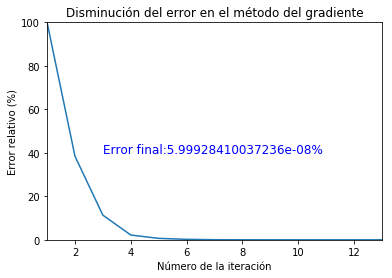

In [14]:
import matplotlib.pyplot as plt
n = len(e)
emin = min(e)
x = np.linspace(1, n, n)
plt.plot(x,e)
plt.title('Disminución del error en el método del gradiente')
plt.xlabel('Número de la iteración')
plt.ylabel('Error relativo (%)')
plt.text(3, 40, 'Error final:'+str(emin)+'%', fontsize=12,color='blue')
plt.axis([1, 13, 0, 100])
plt.show()